<a href="https://colab.research.google.com/github/HelloPenguin1/Pytorch_learning/blob/main/Pytorch_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

### Tensors
- A torch tensor is multi-dim matrix containing elements of a single data type
- Work better on GPUs
- default data type of float32
- more suitable for DL than a numpy array

In [3]:
tensor_2d = torch.randn(3)
tensor_2d

tensor([ 0.6044,  0.1595, -0.6851])

In [5]:
tensor = torch.arange(10)
tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
tensor2 = tensor.reshape(2,5)
tensor

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
tensor3 = torch.arange(15)
tensor3

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
tensor4 = tensor.reshape(-1, 2)

In [17]:
tensor4

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

Simple Neural Network

In [20]:
import torch.nn as nn #torch's neural network
import torch.nn.functional as F  #helps move data forward in a neural network

In [22]:
# create a model class that inherits nn.Module

In [30]:
class Model(nn.Module):
  #Input layer -> Hidden layer 1 (some num of neurons) -> Hl2 (some num of neurons) -> output layer
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instantiate our nn model


    self.fc1= nn.Linear(in_features, h1)     # fully connected layer 1 to linearly passes information from input to hidden layer 1
    self.fc2 = nn.Linear(h1, h2)             # to pass info for hidden 1 to hidden 2
    self.out = nn.Linear(h2, out_features)   # output layer to linearly pass info from h2 to output

  #function to move information
  def forward(self, x):
    x = F.relu(self.fc1(x))  #start with layer one
    x = F.relu(self.fc2(x))  #move to layer 2
    x = self.out(x)
    return x

In [31]:
torch.manual_seed(41)

In [32]:
#create an instance of the model
model = Model()

Load data

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [35]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [41]:
# Change output names to int
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

In [42]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [45]:
# Train Test split
X = df.drop('variety', axis = 1).values
y = df['variety'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

Convert to tensors

In [52]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [54]:
#covert Y features to long tensors
y_train= torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:
#set the criterion of the model to measure the error, how far the predictions are from the output
loss_type = nn.CrossEntropyLoss()

#choose optimizer : ADAM, and learning rate (if error doesnt reduce after some iterations, lower it)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

Train model


In [61]:
epochs =200
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = loss_type(y_pred, y_train)

  losses.append(loss.detach().numpy())


  #print every 10 epochs
  if i%10==0:
    print(f"Epoch: {i} and Loss: {loss}")

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 0.05286872014403343
Epoch: 10 and Loss: 0.04508011043071747
Epoch: 20 and Loss: 0.03979310765862465
Epoch: 30 and Loss: 0.03596426919102669
Epoch: 40 and Loss: 0.03302799537777901
Epoch: 50 and Loss: 0.030512524768710136
Epoch: 60 and Loss: 0.02773350290954113
Epoch: 70 and Loss: 0.024612102657556534
Epoch: 80 and Loss: 0.02167237363755703
Epoch: 90 and Loss: 0.01932021789252758
Epoch: 100 and Loss: 0.0174928717315197
Epoch: 110 and Loss: 0.01604374870657921
Epoch: 120 and Loss: 0.01483999565243721
Epoch: 130 and Loss: 0.013800058513879776
Epoch: 140 and Loss: 0.012878856621682644
Epoch: 150 and Loss: 0.012144574895501137
Epoch: 160 and Loss: 0.011606554500758648
Epoch: 170 and Loss: 0.010983292944729328
Epoch: 180 and Loss: 0.010267996229231358
Epoch: 190 and Loss: 0.00971288699656725


In [62]:
#visualization

Text(0.5, 0, 'Epoch')

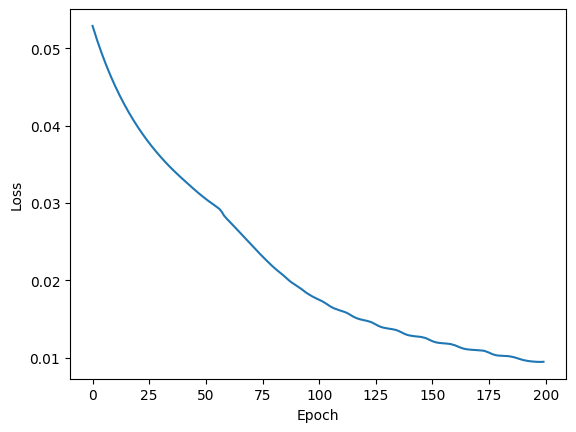

In [63]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')